In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
import io
data= pd.read_csv(io.BytesIO(data_to_load['Iris.csv']))

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
from sklearn.cluster import KMeans

In [ ]:
data_=data.iloc[:,[0,1,2,3]].values #selecting neccessary columns
data_

In [ ]:
#although it's quite visible but still, for exploration purpose, we are using elbow method to obtain the no. of clusters possible
l= []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_)
    l.append(kmeans.inertia_)
plt.plot(range(1,20),l)
plt.title("the elbow method graph")
plt.xlabel('no. of clusters(k)')
plt.ylabel('sse')
plt.show()

In [65]:
k=KMeans(n_clusters=3)

In [66]:
kmeans = k.fit_predict(data_)
print(kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [67]:
centroids = k.cluster_centers_

In [68]:
centroids

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [71]:
data.head()
#data_[kmeans == 0,0]
#kmeans == 0
#data_.shape

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


CHECKING THE QUALITY OF CLUSTERS ABOUT VARIOUS FEATURES


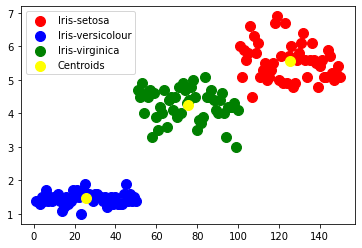

In [62]:
plt.scatter(data_[kmeans == 0,0], data_[kmeans == 0,3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_[kmeans == 1,0], data_[kmeans == 1,3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_[kmeans == 2,0], data_[kmeans == 2,3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

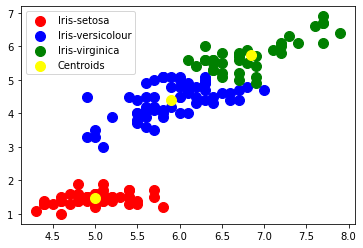

In [52]:
plt.scatter(data_[kmeans == 0,0], data_[kmeans == 0,2], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_[kmeans == 1,0], data_[kmeans == 1,2], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_[kmeans == 2,0], data_[kmeans == 2,2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

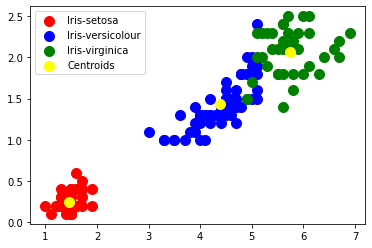

In [48]:
plt.scatter(data_[kmeans == 0,2], data_[kmeans == 0,3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_[kmeans == 1,2], data_[kmeans == 1,3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_[kmeans == 2,2], data_[kmeans == 2,3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 2], centroids[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

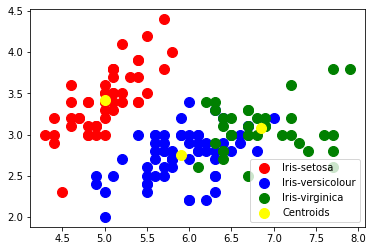

In [45]:
plt.scatter(data_[kmeans == 0,0], data_[kmeans == 0,1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_[kmeans == 1,0], data_[kmeans == 1,1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_[kmeans == 2,0], data_[kmeans == 2,1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


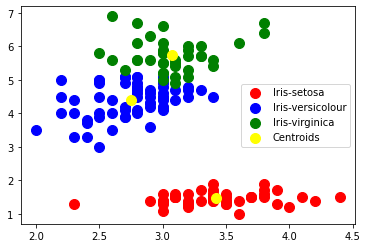

In [46]:
plt.scatter(data_[kmeans == 0,1], data_[kmeans == 0,2], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_[kmeans == 1,1], data_[kmeans == 1,2], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_[kmeans == 2,1], data_[kmeans == 2,2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 1], centroids[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [82]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data_,kmeans))

0.5820898597618552
